In [4]:
import pandas as pd
import numpy as np
import csv

In [5]:
assessment_df = pd.read_csv('dataset/studentinfo.csv')
course_df = pd.read_csv('dataset/courses.csv')

In [6]:
assessment_df.drop(['num_of_prev_attempts'],axis=1)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,30,N,Withdrawn


In [7]:
course_df=course_df.drop_duplicates(['code_module'])
course_df

,code_module,type,code_presentation,module_presentation_length
0,AAA,Social Science,2013J,268
2,BBB,Social Science,2013J,268
6,CCC,STEM,2014J,269
8,DDD,STEM,2013J,261
12,EEE,STEM,2013J,268
15,FFF,STEM,2013J,268
19,GGG,Social Science,2013J,261


In [8]:
match=assessment_df.merge(course_df,on='code_module',how='left')
match=match.drop(['code_presentation_y', 'module_presentation_length'], axis=1)
match

,code_module,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,type
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,Social Science
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,Social Science
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,Social Science
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,Social Science
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,Social Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,Social Science
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,Social Science
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,Social Science
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,Social Science


### Construct a scoring matrix based on the student's final grade
withdrawn:0 (Totally unlike)  fall:1 (dislike) pass:2 (like) distinction:3 (vrey like)

In [9]:
df=match
df['Satisfaction'] = np.where(df['final_result']== 'Withdrawn', '0', 'null' )
df['Satisfaction'] = np.where((df['final_result']== 'Fail') & (df['Satisfaction']== 'null') ,'1',df['Satisfaction'])
df['Satisfaction'] = np.where((df['final_result']== 'Pass')& (df['Satisfaction']== 'null'),'2',df['Satisfaction'])
df['Satisfaction'] = np.where((df['final_result']== 'Distinction')& (df['Satisfaction']== 'null'), '3', df['Satisfaction'])
df

,code_module,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,type,Satisfaction
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,Social Science,2
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,Social Science,2
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,Social Science,0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,Social Science,2
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,Social Science,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,Social Science,1
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,Social Science,3
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,Social Science,2
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,Social Science,0


In [10]:
df.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation_x   32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
 12  type                  32593 non-null  object
 13  Satisfaction          32593 non-null  object
dtypes: int64(3), object(11)
memory usage: 3.7+ MB


In [12]:
df.to_excel('data.xls')
print('save successfully!')

save successfully!


## Clustering K-means

In [21]:
data=pd.DataFrame()
data['id_student']=df['id_student']
data['gender']=  np.where(df['gender']== 'F', 0, 'null' )
data['gender']=  np.where(df['gender']== 'M', 1, data['gender'])
data['highest_education'] = np.where(df['highest_education']== 'A Level or Equivalent', 0, 'null' )
data['highest_education'] = np.where(df['highest_education']== 'HE Qualification', 1, data['highest_education'] )
data['highest_education'] = np.where(df['highest_education']== 'Lower Than A Level', 2, data['highest_education'] )
data['highest_education'] = np.where(df['highest_education']== 'No Formal quals', 3, data['highest_education'] )
data['highest_education'] = np.where(df['highest_education']== 'Post Graduate Qualification',4, data['highest_education'] )
data['disability']= np.where(df['disability']== 'N', 0, 'null' )
data['disability']= np.where(df['disability']== 'Y', 1, data['disability'])
data['studied_credits']=df['studied_credits']
data['Satisfaction']=df['Satisfaction']
data

,id_student,gender,highest_education,disability,studied_credits,Satisfaction
0,11391,1,1,0,240,2
1,28400,0,1,0,60,2
2,30268,0,0,1,60,0
3,31604,0,0,0,60,2
4,32885,0,2,0,60,2
...,...,...,...,...,...,...
32588,2640965,0,2,0,30,1
32589,2645731,0,2,0,30,3
32590,2648187,0,0,1,30,2
32591,2679821,0,2,0,30,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_student         32593 non-null  int64 
 1   gender             32593 non-null  object
 2   highest_education  32593 non-null  object
 3   disability         32593 non-null  object
 4   studied_credits    32593 non-null  int64 
 5   Satisfaction       32593 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.7+ MB


In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Use elbow method to find the best K value.The sum of squared distances (SSE) from the sample points within each cluster to the centre of mass of the cluster in which they are located is used as the performance measure, with smaller values indicating more convergence in each class of cluster.

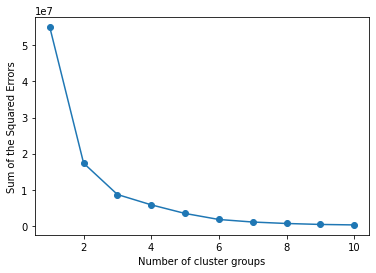

In [33]:
SSE = [] #Sum of squared errors
for i in range(1,11): #k: 1~11
     km = KMeans(n_clusters=i) 
     km.fit(data[['gender','highest_education','disability','studied_credits']])
     SSE.append(km.inertia_) 
plt.plot(range(1, 11), SSE, marker='o')  
plt.xlabel('Number of cluster groups')
plt.ylabel('Sum of the Squared Errors')
plt.show()

### As can be seen from the graph, when the number of groups is 5, it is the point of inflection

In [34]:
kmodel = KMeans(n_clusters=5)
kmodel.fit(data[['gender','highest_education','disability','studied_credits']]) 

KMeans(n_clusters=5)

In [66]:
label = pd.Series(kmodel.labels_)
print(label)
num = pd.Series(kmodel.labels_).value_counts() #Count the number within each category
print(num)
center = pd.DataFrame(kmodel.cluster_centers_) #Find the clustering centre, the value of the centre of mass
print(center)
r = pd.concat([center, num], axis = 1)
print(r)
r.columns = list(data[['gender','highest_education','disability','studied_credits']].columns) + ['number of category']
print(r)

0        2
1        1
2        1
3        1
4        1
        ..
32588    4
32589    4
32590    4
32591    4
32592    4
Length: 32593, dtype: int32
1    16858
0     7213
4     3807
3     3328
2     1387
dtype: int64
          0         1         2           3
0  0.533758  0.962152  0.116318  123.425759
1  0.555463  1.014355  0.081742   60.052201
2  0.498919  1.081471  0.153569  204.646720
3  0.686899  0.981370  0.096154   89.582332
4  0.442080  1.190701  0.108747   30.199632
          0         1         2           3      0
0  0.533758  0.962152  0.116318  123.425759   7213
1  0.555463  1.014355  0.081742   60.052201  16858
2  0.498919  1.081471  0.153569  204.646720   1387
3  0.686899  0.981370  0.096154   89.582332   3328
4  0.442080  1.190701  0.108747   30.199632   3807
     gender  highest_education  disability  studied_credits  \
0  0.533758           0.962152    0.116318       123.425759   
1  0.555463           1.014355    0.081742        60.052201   
2  0.498919           1.

In [87]:
print("Silhouette Coefficient of K-Means clustering is ：", metrics.silhouette_score(data, estimator.labels_, metric='euclidean'))

Silhouette Coefficient of K-Means clustering is ： -0.06733269404876423


 ## Clustering KModes

In [70]:
from kmodes import kmodes

In [77]:
data_km=pd.DataFrame()
data_km['gender'] = data['gender'].astype('int')
data_km['highest_education'] = data['highest_education'].astype('int')
data_km['disability'] = data['disability'].astype('int')
data_km['studied_credits'] = data['studied_credits'].astype('int')


In [79]:
km = kmodes.KModes(n_clusters=5)
clusters = km.fit(data_km[['gender','highest_education','disability','studied_credits']]) 

In [84]:
label_km = pd.Series(clusters.labels_)
print(label_km)
num_km = pd.Series(clusters.labels_).value_counts() #Count the number within each category
r_km=num_km
#print(r)
r_km.columns = list(data[['gender','highest_education','disability','studied_credits']].columns) + ['number of category']
print(r_km)

0        0
1        2
2        0
3        0
4        1
        ..
32588    1
32589    1
32590    4
32591    1
32592    2
Length: 32593, dtype: uint16
0    17468
1     9463
3     2391
4     1726
2     1545
dtype: int64


In [86]:
print("Silhouette Coefficient of Kmodes clustering is ：", metrics.silhouette_score(data_km, estimator.labels_, metric='euclidean'))

Silhouette Coefficient of Kmodes clustering is ： 0.8930187300169852
